In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('product h_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_h= df.drop(['Product Name','Product Category','Month','Year'],axis=1)

In [4]:
sales_h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sales         60 non-null     int64  
 1   SMA_12months  48 non-null     float64
 2   SMA_6months   54 non-null     float64
 3   SMA_3months   57 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [5]:
sales_h.head()

,Sales,SMA_12months,SMA_6months,SMA_3months
Month-Year,,,,
2019-01-01,62686,NaN,NaN,NaN
2019-02-01,74426,NaN,NaN,NaN
2019-03-01,91347,NaN,NaN,NaN
2019-04-01,60600,NaN,NaN,76153.0
2019-05-01,37374,NaN,NaN,75458.0


<Axes: title={'center': 'Product H'}, xlabel='Month-Year'>

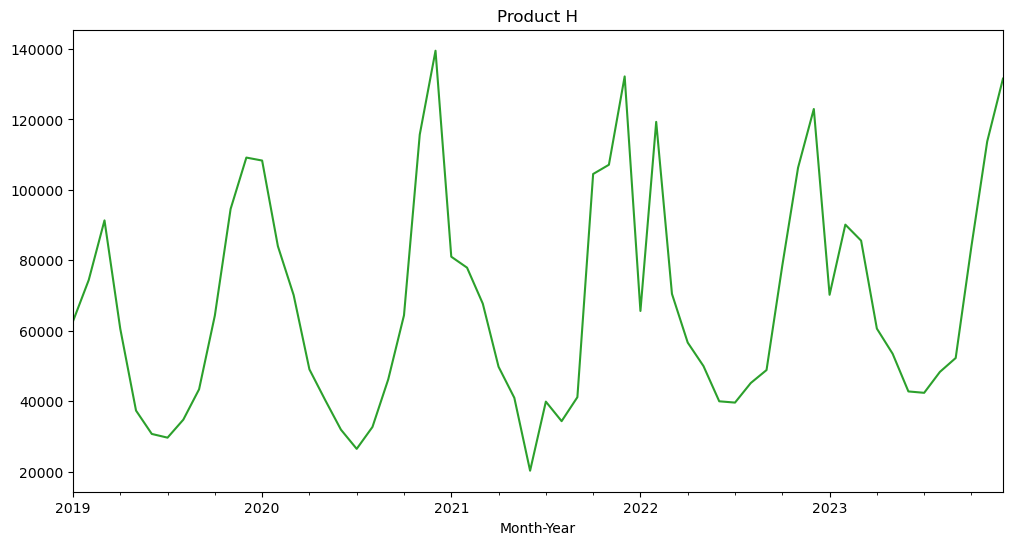

In [6]:
sales_h['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product H')

In [7]:
test_3= sales_h['Sales'].iloc[57:]
test_6=sales_h['Sales'].iloc[54:]
test_12=sales_h['Sales'].iloc[48:]

In [8]:
pred_3=sales_h['SMA_3months'].iloc[57:]
pred_6=sales_h['SMA_6months'].iloc[54:]
pred_12=sales_h['SMA_12months'].iloc[48:]

In [9]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 60801.333
MAPE - Simple Moving Averages_3 months: 0.540
MSE - Simple Moving Averages_3 months: 4046933573.333
RMSE - Simple Moving Averages_3 months: 63615.514


In [10]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 34299.000
MAPE - Simple Moving Averages_6 months: 0.415
MSE - Simple Moving Averages_6 months: 1653806887.667
RMSE - Simple Moving Averages_6 months: 40667.025


In [11]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 21511.250
MAPE - Simple Moving Averages_12 months: 0.320
MSE - Simple Moving Averages_12 months: 670106445.250
RMSE - Simple Moving Averages_12 months: 25886.414


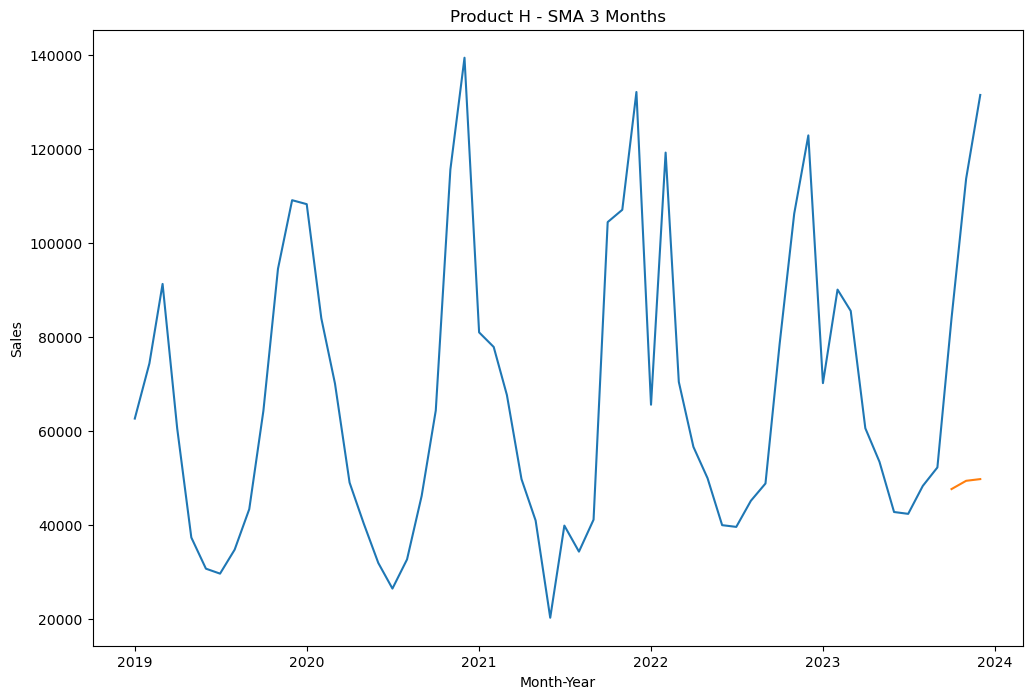

In [12]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h['Sales'])
sns.lineplot(pred_3)
plt.title('Product H - SMA 3 Months')
plt.show()

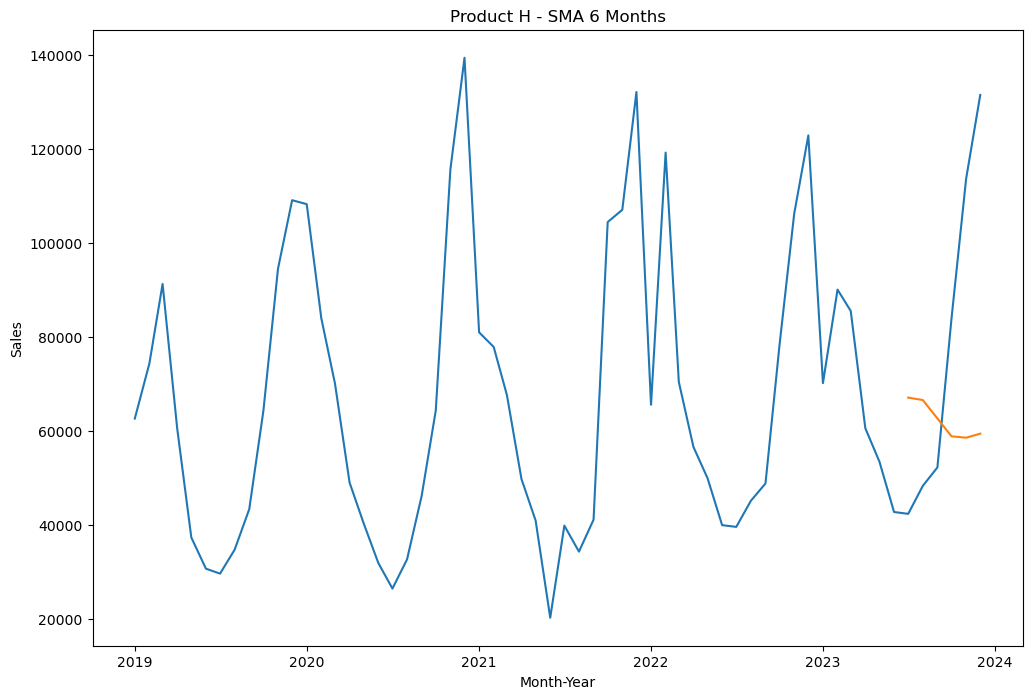

In [13]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h['Sales'])
sns.lineplot(pred_6)
plt.title('Product H - SMA 6 Months')
plt.show()

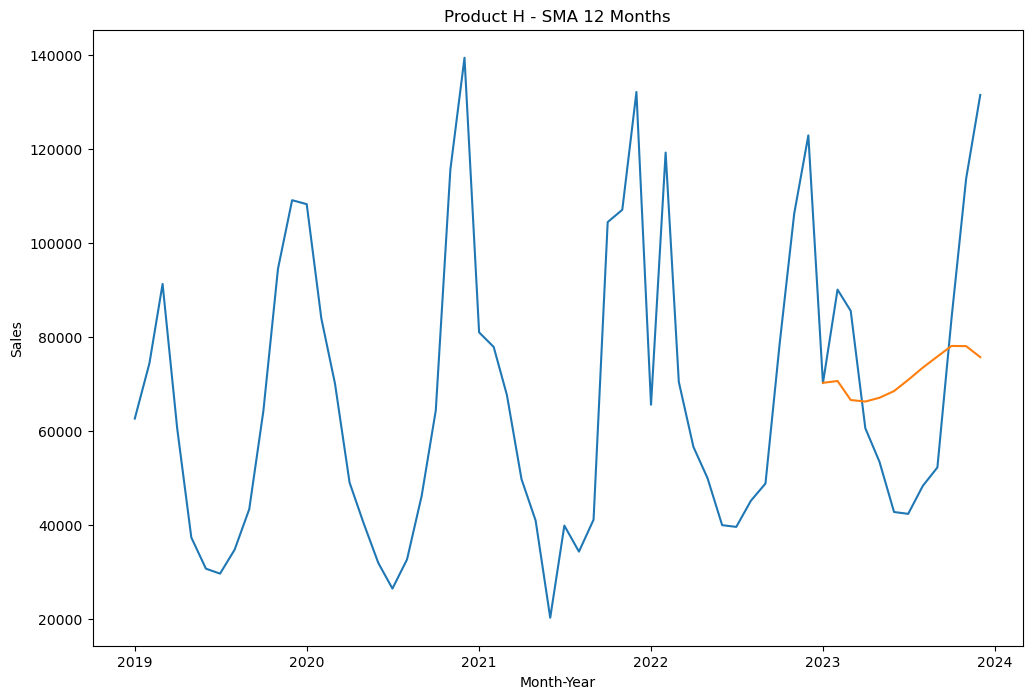

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_h['Sales'])
sns.lineplot(pred_12)
plt.title('Product H - SMA 12 Months')
plt.show()

In [15]:
SALES_H=  df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [17]:
TRAIN=SALES_H[:48]

# Calculate the 12-month moving average for the last 12 months
sma_12 = TRAIN.rolling(window=12).mean().iloc[-1]

In [18]:
# Initialize a list to hold your predictions
predictions = [sma_12]

# Generate predictions for the next 12 months
for i in range(11):
    # Add the most recent prediction to the sales data
    TRAIN= TRAIN.append(predictions[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions.append(TRAIN.rolling(window=12).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions = np.array(predictions)

# Print the predictions
print(predictions)

[[70298.25      ]
 [70686.60416667]
 [66635.15451389]
 [66313.58405671]
 [67117.46606144]
 [68543.92156656]
 [70922.58169711]
 [73530.04683853]
 [75891.80074174]
 [78143.78413689]
 [78112.26614829]
 [75763.28832732]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\267905979.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN= TRAIN.append(predictions[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\267

In [20]:
TEST=SALES_H[48:]
TEST['Predictions']=predictions

C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\832134639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST['Predictions']=predictions


In [21]:
_mae_12= mean_absolute_error(TEST['Sales'],TEST['Predictions'])
_mse_12=mean_squared_error(TEST['Sales'],TEST['Predictions'])
_mape_12= mean_absolute_percentage_error(TEST['Sales'],TEST['Predictions'])
_rmse_12= np.sqrt(mean_squared_error(TEST['Sales'],TEST['Predictions']))

print(f'MAE - Moving Averages_12 months: {_mae_12:0.3f}')
print(f'MAPE - Moving Averages_12 months: {_mape_12:0.3f}')
print(f'MSE - Moving Averages_12 months: {_mse_12:0.3f}')
print(f'RMSE - Moving Averages_12 months: {_rmse_12:0.3f}')

MAE - Moving Averages_12 months: 21511.213
MAPE - Moving Averages_12 months: 0.320
MSE - Moving Averages_12 months: 670100944.093
RMSE - Moving Averages_12 months: 25886.308


In [22]:
TEST

,Sales,Predictions
Month-Year,,
2023-01-01,70232,70298.250000
2023-02-01,90139,70686.604167
2023-03-01,85600,66635.154514
2023-04-01,60633,66313.584057
2023-05-01,53500,67117.466061
2023-06-01,42800,68543.921567
2023-07-01,42408,70922.581697
2023-08-01,48352,73530.046839
2023-09-01,52288,75891.800742


In [23]:
TRAIN_6=SALES_H[:54]

# Calculate the 6-month moving average for the last 6 months
sma_6 = TRAIN_6.rolling(window=6).mean().iloc[-1]

In [24]:
# Initialize a list to hold your predictions
predictions_6 = [sma_6]

# Generate predictions for the next 6 months
for i in range(5):
    # Add the most recent prediction to the sales data
    TRAIN_6= TRAIN_6.append(predictions_6[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_6.append(TRAIN_6.rolling(window=6).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_6 = np.array(predictions_6)

# Print the predictions
print(predictions_6)

[[67150.66666667]
 [66637.11111111]
 [62720.12962963]
 [58906.81790123]
 [58619.12088477]
 [59472.3076989 ]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\135217546.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_6= TRAIN_6.append(predictions_6[-1])
C:\Users\Maaz\AppData\Local\

In [25]:
TEST_6=SALES_H[54:]
TEST_6['Predictions_6']=predictions_6

C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\3110145051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_6['Predictions_6']=predictions_6


In [26]:
_mae_6= mean_absolute_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mse_6=mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_mape_6= mean_absolute_percentage_error(TEST_6['Sales'],TEST_6['Predictions_6'])
_rmse_6= np.sqrt(mean_squared_error(TEST_6['Sales'],TEST_6['Predictions_6']))

print(f'MAE - Moving Averages_6 months: {_mae_6:0.3f}')
print(f'MAPE - Moving Averages_6 months: {_mape_6:0.3f}')
print(f'MSE - Moving Averages_6 months: {_mse_6:0.3f}')
print(f'RMSE - Moving Averages_6 months: {_rmse_6:0.3f}')

MAE - Moving Averages_6 months: 34298.943
MAPE - Moving Averages_6 months: 0.415
MSE - Moving Averages_6 months: 1653797174.600
RMSE - Moving Averages_6 months: 40666.905


In [27]:
TEST_6

,Sales,Predictions_6
Month-Year,,
2023-07-01,42408,67150.666667
2023-08-01,48352,66637.111111
2023-09-01,52288,62720.129630
2023-10-01,84019,58906.817901
2023-11-01,113741,58619.120885
2023-12-01,131572,59472.307699


In [28]:
TRAIN_3=SALES_H[:57]

# Calculate the 3-month moving average for the last 3 months
sma_3 = TRAIN_3.rolling(window=3).mean().iloc[-1]

In [29]:
# Initialize a list to hold your predictions
predictions_3 = [sma_3]

# Generate predictions 
for i in range(2):
    # Add the most recent prediction to the sales data
    TRAIN_3= TRAIN_3.append(predictions_3[-1])
    
    # Calculate the new moving average and add it to the predictions list
    predictions_3.append(TRAIN_3.rolling(window=3).mean().iloc[-1])

# Convert predictions to an array
# Convert predictions to an array
predictions_3 = np.array(predictions_3)

# Print the predictions
print(predictions_3)

[[47682.66666667]
 [49440.88888889]
 [49803.85185185]]


C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])
C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\3984739376.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TRAIN_3= TRAIN_3.append(predictions_3[-1])


In [30]:
TEST_3=SALES_H[57:]
TEST_3['Predictions_3']=predictions_3

C:\Users\Maaz\AppData\Local\Temp\ipykernel_54144\3311767147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TEST_3['Predictions_3']=predictions_3


In [31]:
_mae_3= mean_absolute_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mse_3=mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_mape_3= mean_absolute_percentage_error(TEST_3['Sales'],TEST_3['Predictions_3'])
_rmse_3= np.sqrt(mean_squared_error(TEST_3['Sales'],TEST_3['Predictions_3']))

print(f'MAE - Simple Moving Averages_3 months: {_mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {_mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {_mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {_rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 60801.531
MAPE - Simple Moving Averages_3 months: 0.540
MSE - Simple Moving Averages_3 months: 4046954486.863
RMSE - Simple Moving Averages_3 months: 63615.678


In [32]:
TEST_3

,Sales,Predictions_3
Month-Year,,
2023-10-01,84019,47682.666667
2023-11-01,113741,49440.888889
2023-12-01,131572,49803.851852
